In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [3]:
# Load the Iris dataset
df = pd.read_csv('Iris.csv')
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [4]:
# Drop the non-numeric columns (if any)
df = df.drop(columns=['Id', 'Species'])

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(df)

C:\Users\akshata landge\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\akshata landge\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\akshata landge\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\akshata landge\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak

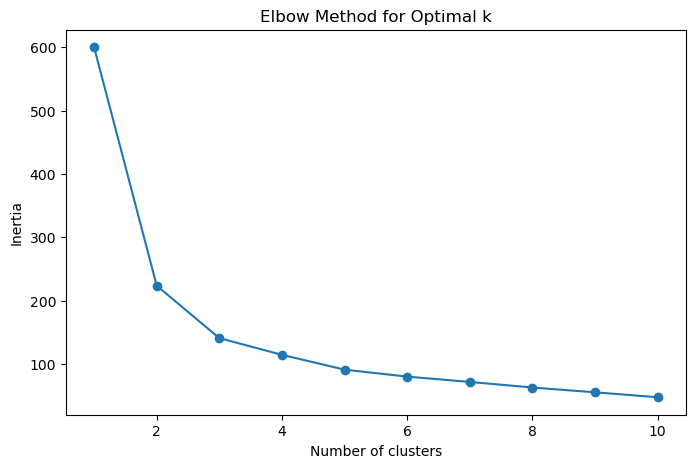

In [5]:
# Calculate the sum of squared distances for a range of cluster numbers
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [6]:
# Assuming the optimal number of clusters is found to be 3 (example value, adjust according to your elbow plot)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
clusters = kmeans.fit_predict(X)

# Add cluster labels to the original data
df['Cluster'] = clusters
print(df.head())

C:\Users\akshata landge\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\akshata landge\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Cluster
0            5.1           3.5            1.4           0.2        1
1            4.9           3.0            1.4           0.2        1
2            4.7           3.2            1.3           0.2        1
3            4.6           3.1            1.5           0.2        1
4            5.0           3.6            1.4           0.2        1


In [7]:
silhouette_avg = silhouette_score(X, clusters)
print(f'Silhouette Score for k={optimal_k}: {silhouette_avg}')

Silhouette Score for k=3: 0.4589717867018717


In [ ]:
















































































K-means is a popular clustering algorithm used in data science and machine learning to partition data into distinct clusters. Here’s a breakdown of how it works and what it’s used for:

Purpose of K-means
K-means is used to categorize data points into groups (clusters) based on similarity. For example, it can segment customers into groups based on buying behavior or organize housing prices by geographic similarity.

How K-means Works
Initialize Cluster Centers: First, you specify the number of clusters, k, you want to find. The algorithm then randomly initializes k points, called centroids, which will represent the center of each cluster.

Assign Data Points to Nearest Cluster: Each data point is assigned to the cluster represented by the closest centroid. The "closeness" is usually determined by the Euclidean distance between the data point and the centroid.

Update Centroids: Once all points are assigned, the centroid of each cluster is recalculated as the mean (average) of all points in the cluster. This moves the centroids toward the center of their assigned points.

Repeat Steps 2 and 3: Steps 2 and 3 are repeated until the centroids no longer move significantly, or a set number of iterations is reached. This means the algorithm has converged, and clusters are now stable.